# k近邻

## 2.1.1 准备：使用python导入数据

In [1]:
import numpy as np
import operator

def createDataSet():
    group=np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels


In [2]:
group,labels=createDataSet()

In [3]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [4]:
labels

['A', 'A', 'B', 'B']

## 2.1.2 实施kNN算法

In [5]:
def classify0(inX,dataSet,labels,k):
    dataSetSize=dataSet.shape[0]
    if k>dataSetSize:
        raise Exception('k大于训练数据量')
    diffMat=np.tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat=diffMat**2
    distances=sqDiffMat.sum(axis=1)
    sortedDistIndicies=distances.argsort()##返回排序的索引
    classCount={}
    for i in range(k):
        voteLabel=labels[sortedDistIndicies[i]]
        classCount[voteLabel]=classCount.get(voteLabel,0)+1
    sortedClassCount=sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]


In [6]:
classify0([1,2],group,labels,3)

'A'

## 2.2.1 准备数据：从文本文件中解析数据

In [7]:
def file2matrix(filename,columnsNum):
    with open(filename) as fr:
        arrayOfLines=fr.readlines()
        numberOfLine=len(arrayOfLines)
        returnMat=np.zeros((numberOfLine,columnsNum))
        classLabelVector=[]
        index=0
        for line in arrayOfLines:
            line=line.strip()
            listFromLine=line.split('\t')
            returnMat[index,:]=listFromLine[0:columnsNum]
            classLabelVector.append(int(listFromLine[-1]))
            index+=1
        return returnMat,classLabelVector

In [8]:
datingDataMat,datingDataMatLabels=file2matrix('datingTestSet.txt',3)

In [9]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [10]:
datingDataMatLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

## 2.2.2 分析数据：使用Matplotlib创建散点图

/usr/local/Cellar/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


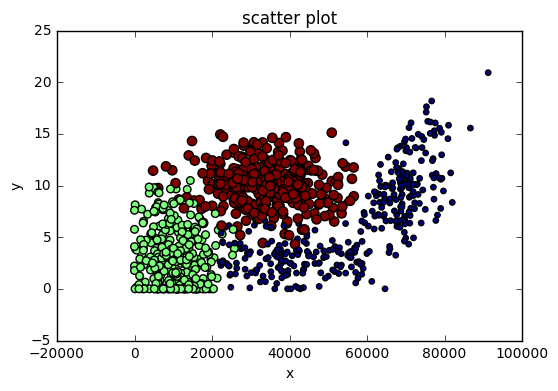

In [11]:
#coding: utf-8
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],s=15*np.array(datingDataMatLabels),c=15*np.array(datingDataMatLabels))
ax.set_title('scatter plot')
plt.xlabel('x')
plt.ylabel('y')
ax.legend(loc='upper left')
plt.show()

In [12]:
def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSet=np.zeros(np.shape(dataSet))
    m=dataSet.shape[0]
    normDataSet=dataSet-np.tile(minVals,(m,1))
    normDataSet=normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minVals;

In [13]:
normMat,ranges,minVals=autoNorm(datingDataMat)

## 2.2.4 测试算法：作为完整程序验证分类器

In [14]:
def datingClassTest():
    hoRatio=0.10
    datingDataMat,datingLabels=file2matrix('datingTestSet.txt',3)
    
    m=datingDataMat.shape[0]##总的样本数
    numTest=int(m*hoRatio)##测试集样本数
    print '测试集数量为%d'%(numTest)
    testSet=datingDataMat[0:numTest,:]##测试集
    testSetLabels=datingLabels[0:numTest]##测试集真实标签
    
    trainSet=datingDataMat[numTest:m,:]##训练集
    trainSetLabels=datingLabels[numTest:m]##训练集标签
    

    normTrainSet,ranges,minVals=autoNorm(trainSet)##训练集极差归一化
    
    normTestSet=testSet-np.tile(minVals,(numTest,1))
    normTestSet=normTestSet/np.tile(ranges,(numTest,1))##测试集归一化
#     normTestSet=(testSet-np.tile(minVals,(numTest,1)))/np.tile(ranges,(numTest,1))##测试集归一化
    
    errorCount=0.0
    for i in range(numTest):
        classifierResult=classify0(normTestSet[i,:],normTrainSet,trainSetLabels,3)
        print 'the classifier came back with :%d,the real answer is:%d'\
                %(classifierResult,testSetLabels[i])
        if(classifierResult!=testSetLabels[i]):
            errorCount+=1;
    print 'the total error rate is:%f'%(1.0*errorCount/numTest)

In [15]:
datingClassTest()

测试集数量为100
the classifier came back with :3,the real answer is:3
the classifier came back with :2,the real answer is:2
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier came back with :3,the real answer is:3
the classifier came back with :3,the real answer is:3
the classifier came back with :1,the real answer is:1
the classifier came back with :3,the real answer is:3
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier came back with :2,the real answer is:2
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier came back with :1,the real answer is:1
the classifier cam

## 2.2.5 使用算法：构建完整可用系统

In [16]:
def classifyPerson():
    resultList=['not at all','in small doses','in large doses']
    percentTats=float(raw_input('percentage of time spend playing video games?'))
    ffMiles=float(raw_input('frequent flier miles earned per year?'))
    iceCream=float(raw_input('liters of ice cream consumed per year?'))
    inArr=np.array([percentTats,ffMiles,iceCream])
    
    trainSet,trainSetLabels=file2matrix('datingTestSet.txt',3)
       
    normTrainSet,ranges,minVals=autoNorm(trainSet)
    
    inArr=inArr-minVals
    inArr=inArr/ranges
    
    classifierResult=classify0(inArr,normTrainSet,trainSetLabels,3)

    print 'you will probably like this person:%s'%(resultList[classifierResult-1])

In [17]:
classifyPerson()

percentage of time spend playing video games?200
frequent flier miles earned per year?111
liters of ice cream consumed per year?111
you will probably like this person:in large doses


## 2.3 示例：手写识别系统

## 2.3.1 准备数据：将图像转换成测试向量

In [42]:
def img2Vector(filename):
    returnVect=np.zeros((1,1024))
    with open(filename) as fr:
        for i in range(32):
            lineStr=fr.readline()
            for j in range(32):
                returnVect[0,i+32*j]=int(lineStr[j])
    return returnVect

In [21]:
testVect=img2Vector('digits/testDigits/0_1.txt')

In [26]:
testVect[0,250:300]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## 2.3.2 测试算法：使用k-近邻算法识别手写数字

In [59]:
import os
def handwritingClassTest():
    hwLabels=[]
    trainingFileList=os.listdir('digits/trainingDigits')
    m=len(trainingFileList)
    trainingMat=np.zeros((m,1024))
    for i in range(m):
        fileNameStr=trainingFileList[i]
        if fileNameStr=='.DS_Store':
            continue
        fileStr=fileNameStr.split('.')[0]
        classNumStr=fileStr.split('_')[0]
        hwLabels.append(classNumStr)
        trainingMat[i,:]=img2Vector('digits/trainingDigits/%s'%fileNameStr)
    testFileList=os.listdir('digits/testDigits')
    errorCount=0.0
    mTest=len(testFileList)
    for i in range(mTest):
        fileNameStr=testFileList[i]
        if fileNameStr=='.DS_Store':
            continue
        fileStr=fileNameStr.split('.')[0]
        classNumStr=fileStr.split('_')[0]
        vectorUnderTest=img2Vector('digits/testDigits/%s'%fileNameStr)
        classifierResult=classify0(vectorUnderTest,trainingMat,hwLabels,3)
        if(classifierResult!=classNumStr):
            errorCount+=1
    print 'the total error rate is:%f'%(1.0*errorCount/mTest)

In [60]:
handwritingClassTest()

the total error rate is:0.012672
